In [107]:
import imp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from mlxtend.plotting import plot_decision_regions

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest



from sklearn import metrics

### Data Preprocessing

In [106]:
from sklearn import feature_selection


df = pd.read_csv('penguins_train.csv')
arr = df['Island'].unique()
for i in range(len(arr)):
    df['Island'].replace(arr[i],i,inplace=True)
arr = df['Sex'].unique()
for i in range(len(arr)):
    df['Sex'].replace(arr[i],i,inplace=True)
df['Clutch Completion'].replace('Yes',1,inplace=True)
df['Clutch Completion'].replace('No',0,inplace=True)

unique_species = df['Species'].unique()
for i in range(len(unique_species)):
    df['Species'].replace(unique_species[i],i,inplace=True)
df['Culmen Length (mm)'] = pd.to_numeric(df['Culmen Length (mm)'])
df['Culmen Depth (mm)'] = pd.to_numeric(df['Culmen Depth (mm)'])
df['Flipper Length (mm)'] = pd.to_numeric(df['Flipper Length (mm)'])
df['Body Mass (g)'] = pd.to_numeric(df['Body Mass (g)'])

for i in range(len(df.columns)):
    df[df.columns[i]] = df[df.columns[i]].fillna(df[df.columns[i]].mode()[0])

# for i in range(len(df.columns)):
#     df[df.columns[i]] = df[df.columns[i]].fillna(df[df.columns[i]].mode()[0])

# scaler = StandardScaler()
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = scaler.fit_transform(df['Culmen Length (mm)'].values.reshape(-1,1))
# df['Culmen Length (mm)'] = scaled_data
# scaled_data = scaler.fit_transform(df['Culmen Depth (mm)'].values.reshape(-1,1))
# df['Culmen Depth (mm)'] = scaled_data
# scaled_data = scaler.fit_transform(df['Flipper Length (mm)'].values.reshape(-1,1))
# df['Flipper Length (mm)'] = scaled_data
# scaled_data = scaler.fit_transform(df['Body Mass (g)'].values.reshape(-1,1))
# df['Body Mass (g)'] = scaled_data
# scaled_data = scaler.fit_transform(df['Delta 15 N (o/oo)'].values.reshape(-1,1))
# df['Delta 15 N (o/oo)'] = scaled_data
# scaled_data = scaler.fit_transform(df['Delta 13 C (o/oo)'].values.reshape(-1,1))
# df['Delta 13 C (o/oo)'] = scaled_data

# le = LabelEncoder()
# df['Sex'] = le.fit_transform(df['Sex'])
# df['Island'] = le.fit_transform(df['Island'])
# df['Clutch Completion'] = le.fit_transform(df['Clutch Completion'])

# arr = df['Species'].unique()
# for i in range(len(arr)):
#     df['Species'].replace(arr[i],i,inplace=True)



df.head()

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
0,0,1,38.8,17.2,180.0,3800.0,0,9.63954,-25.29856,0
1,1,1,41.1,18.6,189.0,3325.0,0,9.32277,-26.09989,0
2,0,1,39.0,17.5,186.0,3550.0,1,8.57199,-26.07188,0
3,2,0,39.7,17.9,193.0,4250.0,0,9.25769,-25.88798,0
4,0,1,47.5,14.2,209.0,4600.0,1,8.39299,-26.78733,1


### Split the data

In [97]:
features = df[['Island','Clutch Completion','Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Sex','Delta 15 N (o/oo)','Delta 13 C (o/oo)']]
label = df['Species']
X_train, X_test, y_train, y_test = train_test_split(features, label,train_size=0.7,test_size=0.3)
# def correlation(dataset, threshold):
#     col_corr = set()  
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i, j]) > threshold:
#                 colname = corr_matrix.columns[i]
#                 col_corr.add(colname)
#     return col_corr
# corr_features = correlation(X_train, 0.85)
# X_train.drop(corr_features,axis=1)
# X_test.drop(corr_features,axis=1)

# mutual_info = mutual_info_classif(X_train, y_train)
# mutual_info = pd.Series(mutual_info)
# mutual_info.index = X_train.columns
# mutual_info.sort_values(ascending=False)
# mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

# sel_five_cols = SelectKBest(mutual_info_classif, k=5)
# sel_five_cols.fit(X_train, y_train)
# X_train.columns[sel_five_cols.get_support()]


In [102]:
def plot_roc_curve(fpr, tpr, roc_auc, i, color):
    lw = 2
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc[i],
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")


### Different Classifier Accuracies

SVC Accuracy: 0.9759036144578314
precision: 0.9797619047619047
recall: 0.9708333333333333
f1: 0.9748533724340177


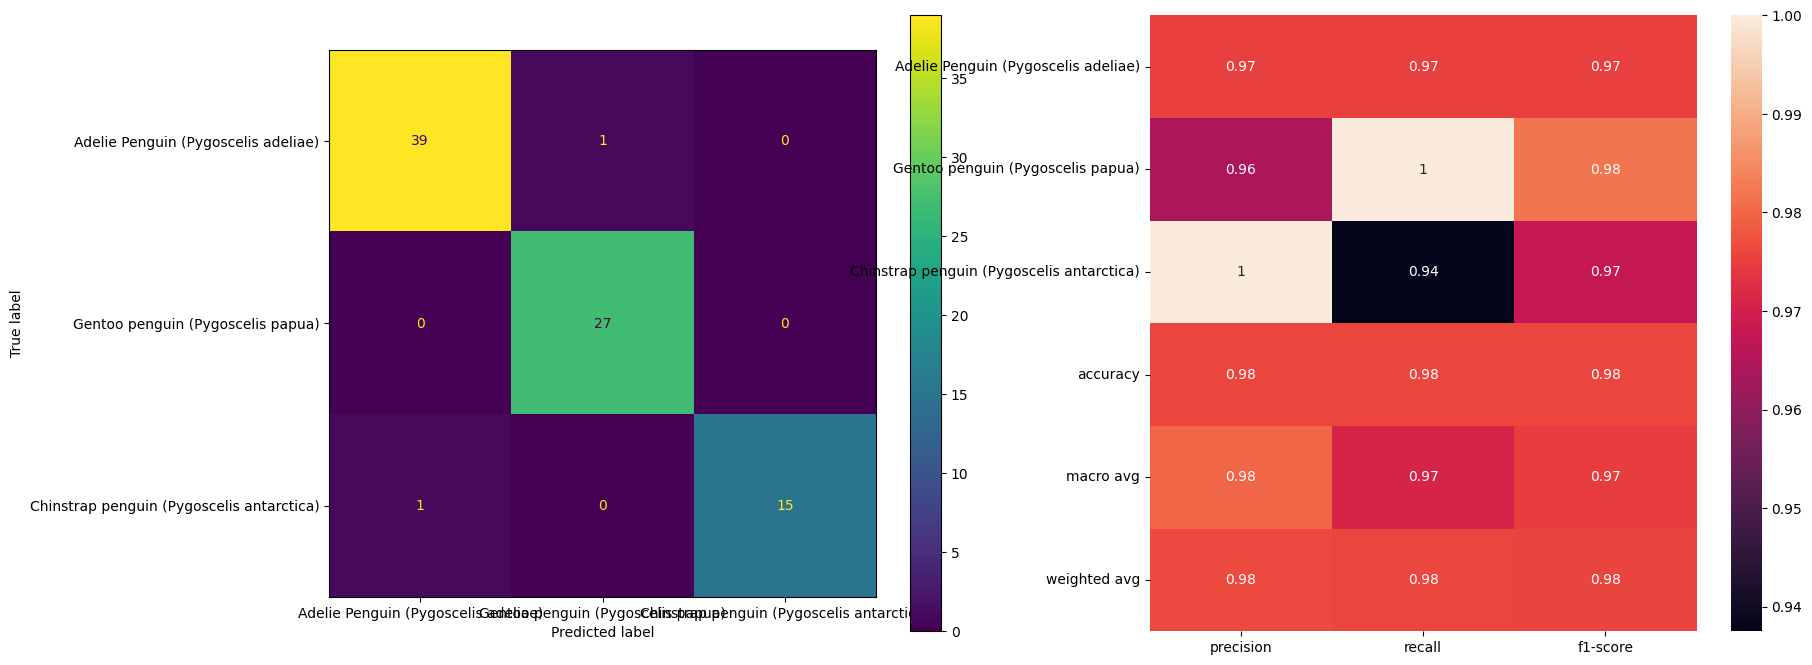

KNN Classifier Accuracy: 0.7469879518072289
Accuracy: 0.7469879518072289
precision: 0.7333333333333334
recall: 0.6759259259259259
f1: 0.693121693121693


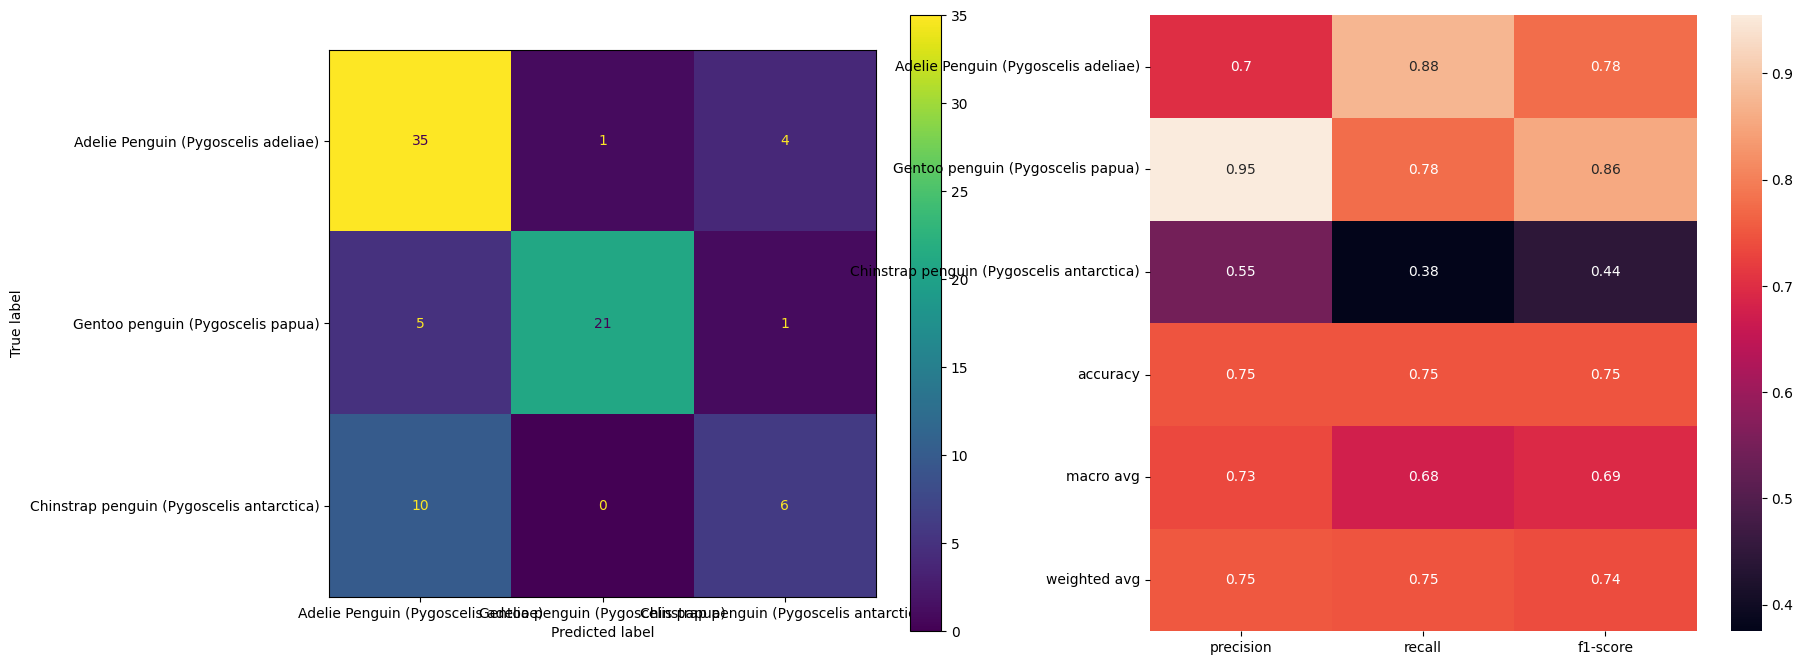

Decision Tree Classifier Accuracy: 0.9759036144578314
Accuracy: 0.9759036144578314
precision: 0.979320987654321
recall: 0.979320987654321
f1: 0.979320987654321


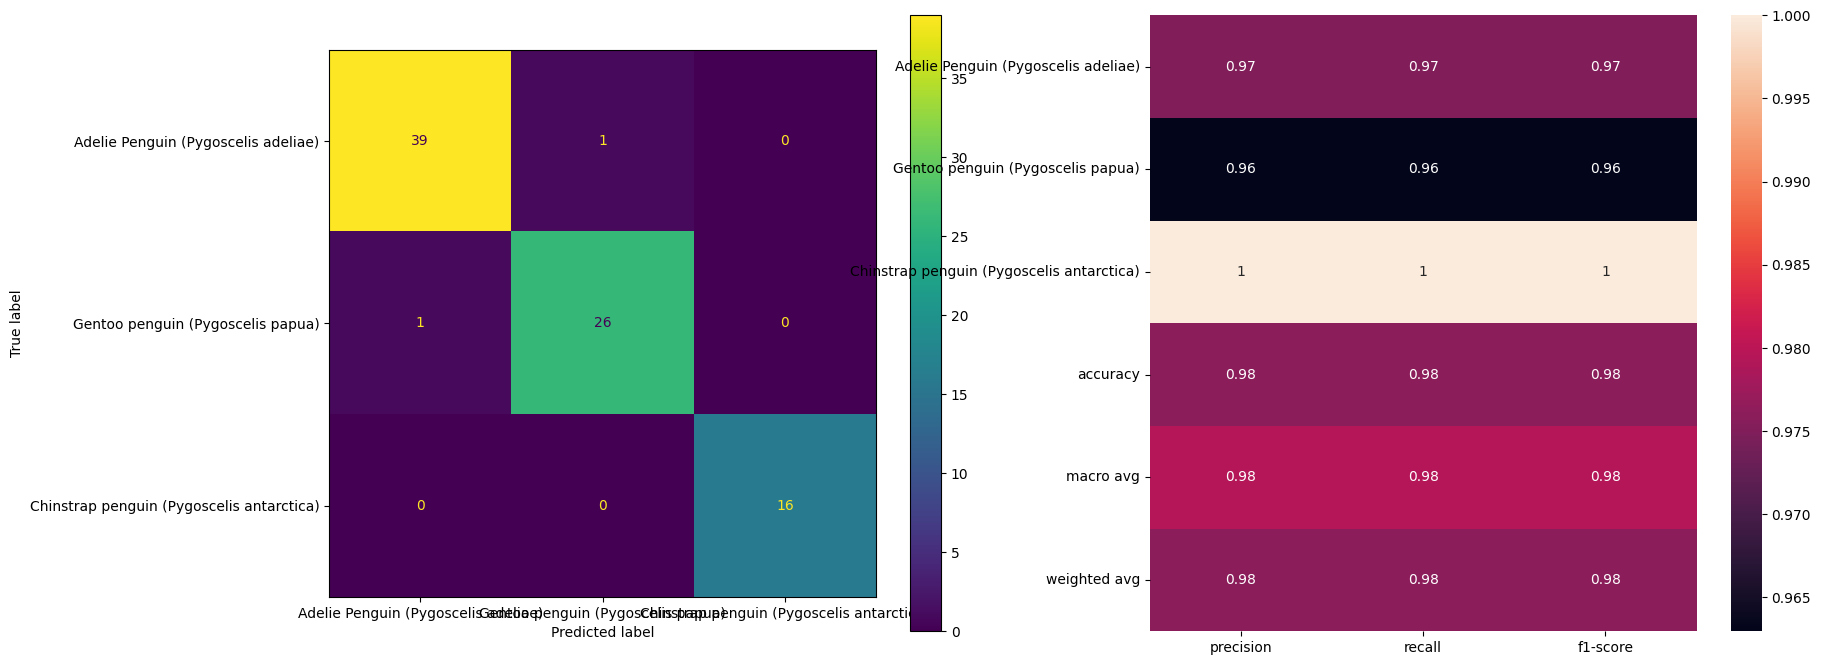

Random Forest Classifier Accuracy: 1.0
Accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0


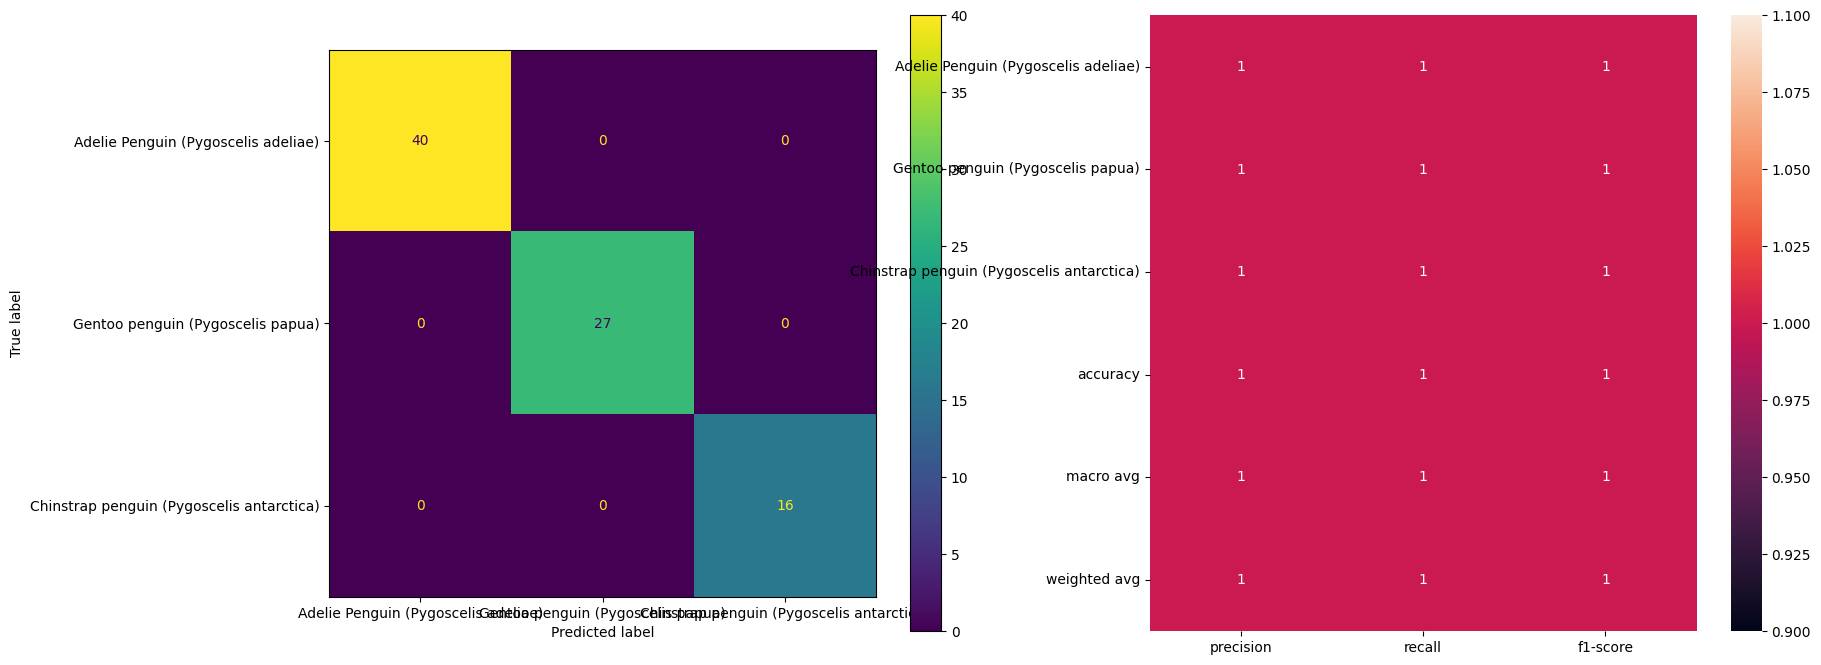

AdaBoost Classifier Accuracy: 1.0
Accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0


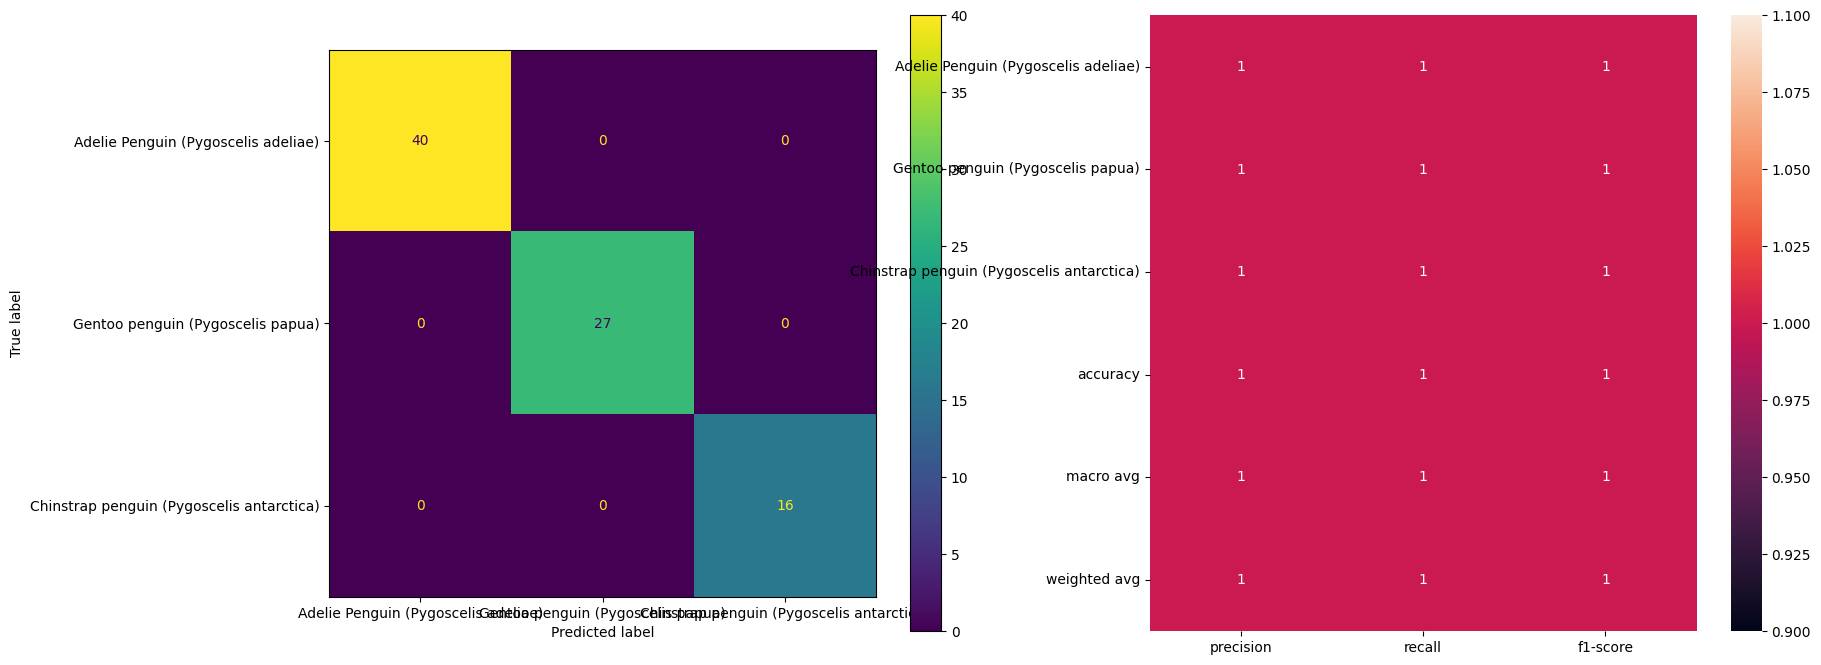

In [111]:

from types import new_class


def train_ovo_svc(X_train, y_train):
    classifiers = []
    for i in range(0,3):
        for j in range(i+1,3):
            X_train1 = X_train[(y_train==i) | (y_train==j)]
            y_train1 = y_train[(y_train==i) | (y_train==j)]
            model = SVC(kernel="linear", C=0.025)
            model.fit(X_train1, y_train1)
            classifiers.append(model)
    return classifiers
def train_ovo_knn(X_train, y_train):
    classifiers = []
    for i in range(0,3):
        for j in range(i+1,3):
            X_train1 = X_train[(y_train==i) | (y_train==j)]
            y_train1 = y_train[(y_train==i) | (y_train==j)]
            model = KNeighborsClassifier()
            model.fit(X_train1, y_train1)
            classifiers.append(model)
    return classifiers
def train_ovo_dt(X_train, y_train):
    classifiers = []
    for i in range(0,3):
        for j in range(i+1,3):
            X_train1 = X_train[(y_train==i) | (y_train==j)]
            y_train1 = y_train[(y_train==i) | (y_train==j)]
            model = DecisionTreeClassifier()
            model.fit(X_train1, y_train1)
            classifiers.append(model)
    return classifiers
def train_ovo_rf(X_train, y_train):
    classifiers = []
    for i in range(0,3):
        for j in range(i+1,3):
            X_train1 = X_train[(y_train==i) | (y_train==j)]
            y_train1 = y_train[(y_train==i) | (y_train==j)]
            model = RandomForestClassifier()
            model.fit(X_train1, y_train1)
            classifiers.append(model)
    return classifiers

def train_ovo_ada(X_train, y_train):
    classifiers = []
    for i in range(0,3):
        for j in range(i+1,3):
            X_train1 = X_train[(y_train==i) | (y_train==j)]
            y_train1 = y_train[(y_train==i) | (y_train==j)]
            model = AdaBoostClassifier()
            model.fit(X_train1, y_train1)
            classifiers.append(model)
    return classifiers

def test_ovo(X_test, classifiers):
    y_pred = []
    for i in range(0,3):
            y_pred.append(classifiers[i].predict(X_test))
    y_pred = np.array(y_pred)
    y_final=[]
    for i in range(0,len(y_pred[0])):
        y_final.append(np.argmax(np.bincount(y_pred[:,i])))
    return y_final

y_true = label_binarize(y_test, classes=[0, 1, 2])
n_classes = 3

x_axis = []
y_axis = []
print("SVC",end=" ")
ovo = train_ovo_svc(X_train, y_train)
y_pred = test_ovo(X_test, ovo)
y_axis.append(accuracy_score(y_test, y_pred))
x_axis.append("SVC")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred, average="macro"))
print("recall:", recall_score(y_test, y_pred, average="macro"))
print("f1:", f1_score(y_test, y_pred, average="macro"))
cm = confusion_matrix(unique_species[y_test], unique_species[y_pred], labels=unique_species)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_species)
figure = plt.figure(figsize=(30, 8))
ax = plt.subplot(1, 3, 1)
disp.plot(ax=ax)
clf_report = classification_report(
    unique_species[y_test],
    unique_species[y_pred],
    labels=unique_species,
    target_names=unique_species,
    output_dict=True,
)
ax = plt.subplot(1, 3, 2)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, ax=ax)
plt.show()




print("KNN Classifier",end=" ")
ovo = train_ovo_knn(X_train, y_train)
y_pred = test_ovo(X_test, ovo)
y_axis.append(accuracy_score(y_test, y_pred))
x_axis.append("KNN")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred, average="macro"))
print("recall:", recall_score(y_test, y_pred, average="macro"))
print("f1:", f1_score(y_test, y_pred, average="macro"))
cm = confusion_matrix(unique_species[y_test], unique_species[y_pred], labels=unique_species)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_species)
figure = plt.figure(figsize=(30, 8))
ax = plt.subplot(1, 3, 1)
disp.plot(ax=ax)
clf_report = classification_report(
    unique_species[y_test],
    unique_species[y_pred],
    labels=unique_species,
    target_names=unique_species,
    output_dict=True,
)
ax = plt.subplot(1, 3, 2)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, ax=ax)
plt.show()


print("Decision Tree Classifier",end=" ")
ovo = train_ovo_dt(X_train, y_train)
y_pred = test_ovo(X_test, ovo)
y_axis.append(accuracy_score(y_test, y_pred))
x_axis.append("DT")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred, average="macro"))
print("recall:", recall_score(y_test, y_pred, average="macro"))
print("f1:", f1_score(y_test, y_pred, average="macro"))
cm = confusion_matrix(unique_species[y_test], unique_species[y_pred], labels=unique_species)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_species)
figure = plt.figure(figsize=(30, 8))
ax = plt.subplot(1, 3, 1)
disp.plot(ax=ax)
clf_report = classification_report(
    unique_species[y_test],
    unique_species[y_pred],
    labels=unique_species,
    target_names=unique_species,
    output_dict=True,
)
ax = plt.subplot(1, 3, 2)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, ax=ax)
plt.show()

print("Random Forest Classifier",end=" ")
ovo = train_ovo_rf(X_train, y_train)
y_pred = test_ovo(X_test, ovo)
y_axis.append(accuracy_score(y_test, y_pred))
x_axis.append("RF")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred, average="macro"))
print("recall:", recall_score(y_test, y_pred, average="macro"))
print("f1:", f1_score(y_test, y_pred, average="macro"))
cm = confusion_matrix(unique_species[y_test], unique_species[y_pred], labels=unique_species)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_species)
figure = plt.figure(figsize=(30, 8))
ax = plt.subplot(1, 3, 1)
disp.plot(ax=ax)
clf_report = classification_report(
    unique_species[y_test],
    unique_species[y_pred],
    labels=unique_species,
    target_names=unique_species,
    output_dict=True,
)
ax = plt.subplot(1, 3, 2)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, ax=ax)
plt.show()

print("AdaBoost Classifier",end=" ")
ovo = train_ovo_ada(X_train, y_train)
y_pred = test_ovo(X_test, ovo)
y_axis.append(accuracy_score(y_test, y_pred))
x_axis.append("ADA")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred, average="macro"))
print("recall:", recall_score(y_test, y_pred, average="macro"))
print("f1:", f1_score(y_test, y_pred, average="macro"))
cm = confusion_matrix(unique_species[y_test], unique_species[y_pred], labels=unique_species)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_species)
figure = plt.figure(figsize=(30, 8))
ax = plt.subplot(1, 3, 1)
disp.plot(ax=ax)
clf_report = classification_report(
    unique_species[y_test],
    unique_species[y_pred],
    labels=unique_species,
    target_names=unique_species,
    output_dict=True,
)
ax = plt.subplot(1, 3, 2)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, ax=ax)
plt.show()

# plt.bar(x_axis, y_axis)
# plt.show()


In [99]:
# one vs all classifier
model = OneVsRestClassifier(DecisionTreeClassifier())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("One vs All Classifier",end=" ")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

model = OneVsOneClassifier(DecisionTreeClassifier())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("One vs One Classifier",end=" ")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



One vs All Classifier Accuracy: 0.963855421686747
One vs One Classifier Accuracy: 0.9759036144578314


### Feature selection and Engineering
For feature engineering, we replace all NA values with the mode of the data.

For the continuous features, we standardise the data to make mean 0 and standard deviation 1.

In [100]:
for i in range(len(df.columns)):
    df[df.columns[i]] = df[df.columns[i]].fillna(df[df.columns[i]].mode()[0])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df['Culmen Length (mm)'].values.reshape(-1,1))
df['Culmen Length (mm)'] = scaled_data
scaled_data = scaler.fit_transform(df['Culmen Depth (mm)'].values.reshape(-1,1))
df['Culmen Depth (mm)'] = scaled_data
scaled_data = scaler.fit_transform(df['Flipper Length (mm)'].values.reshape(-1,1))
df['Flipper Length (mm)'] = scaled_data
scaled_data = scaler.fit_transform(df['Body Mass (g)'].values.reshape(-1,1))
df['Body Mass (g)'] = scaled_data
scaled_data = scaler.fit_transform(df['Delta 15 N (o/oo)'].values.reshape(-1,1))
df['Delta 15 N (o/oo)'] = scaled_data
scaled_data = scaler.fit_transform(df['Delta 13 C (o/oo)'].values.reshape(-1,1))
df['Delta 13 C (o/oo)'] = scaled_data

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Island'] = le.fit_transform(df['Island'])
df['Clutch Completion'] = le.fit_transform(df['Clutch Completion'])

arr = df['Species'].unique()
for i in range(len(arr)):
    df['Species'].replace(arr[i],i,inplace=True)

df.head()

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
0,0,1,-0.940094,0.003372,-1.478967,-0.475067,0,1.577780,0.507374,0
1,1,1,-0.523494,0.722038,-0.834370,-1.069443,0,1.045160,-0.463252,0
2,0,1,-0.903868,0.157372,-1.049236,-0.787896,1,-0.217208,-0.429325,0
3,2,0,-0.777077,0.362705,-0.547882,0.088026,0,0.935734,-0.206572,0
4,0,1,0.635742,-1.536625,0.598070,0.525987,1,-0.518180,-1.295927,1


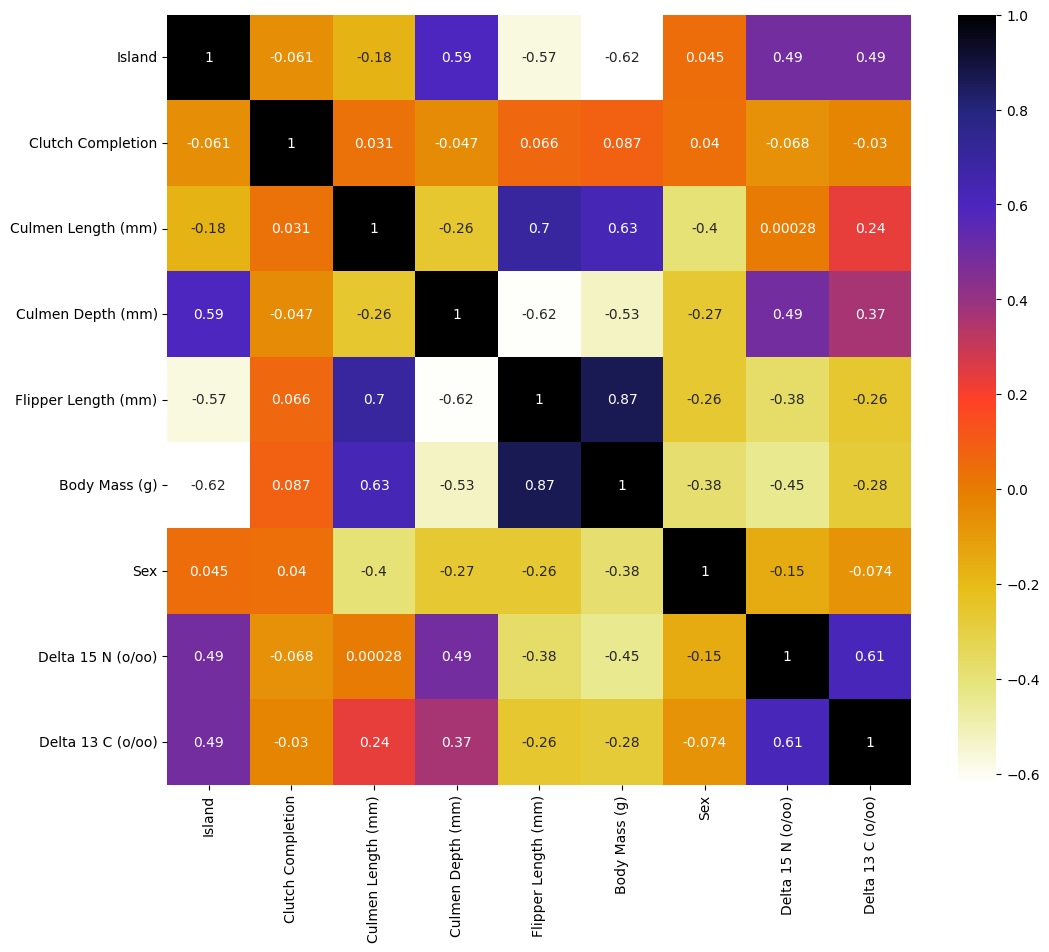

In [72]:
cor = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

In [75]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X_train, 0.85)
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)


{'Body Mass (g)'}